# 파이썬 프로그래밍 실습과제2
- 쇼핑몰 데이터
- 시트1만 사용
- 신:신용카드
- 웰컴 포인트 (웰컴마일)
- 포 포인트
- 적 적리금
- 현금성/비현금성
- 정기결제
- 후불결제
- 우리가 데이터분석을 할때는 개인정보가 의심되는 것들을 삭제하거나 가려야함.(개인정보 보호법)
- 할부기간 1개월 좀 이상
### RFM 분석
- 필수분석 (강의 자료 참고만으로 해결 가능)
    1. 입점 기업별 RFM 분석(3그룹) 진행
    2. 매출 시각화
         1. 월별, 연도별 매출
         2. 월별 순수익 (처리 상황, 할부기간 고려)
    3. 결제 방법에 따른 분석
        1. 결제 방법과 결제 금액의 연관성 분석
        1. 결제방법은 맨 앞의 한가지만 사용한 것으로 간주
- 선택분석 (강의 자료 참고만으로 해결 가능)
    1. 매출 시각화 2
        a. 최대 매출 상품 3종류 집계
        b. 주문 연도에 따른 해당 상품의 매출 증감 분석
    2. 연관성 분석
    
### 제출마감 기한 (7/18 저녁 9시까지)
- 보고서 형식으로 제출
- 보고서에 코드 복붙 x
- py 파일 또는 주피터 노트북 파일 올리기
- 코드는 재현성이 가능해야 함
- 코드 쓸때는 주석 적기, 무슨 변수는 뭘 뜻한다
- 보고서는 아무것도 모르는 사람이 보는 것, 최대한 다 설명하기
- 캡처시 index 번호 지우기 (0,1,2,3 등등)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# -' 깨짐 해결'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from scipy import stats
# 한글 깨짐 해결
plt.rc('font', family='Malgun Gothic')

### 필수분석 1번) 입점 기업별 RFM 분석(3그룹) 진행

- 지출 금액에 따라 3그룹으로 분류하기

In [2]:
df = pd.read_excel("미니프로젝트-쇼핑몰 실습데이터.xlsx")

In [3]:
df['처리상태'].unique()

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [4]:
# df2: 처리상태 = 구매확정 데이터, 구매확정은 교환, 환불이 안된다고 가정
df2 = df[df['처리상태'] == '구매확정']

In [5]:
df2['업체명'].unique()

array(['지니', '쥬크박스', '조이스', '라온웍스', '산스토어', '유앤알코리아', '네오필립', '거영아이앤디',
       '가이스파트너스', '레인트리', '빅픽처', '에이스디포', '로렌츄컴퍼니', '피플이엔티', '비즈마켓렌탈',
       '플레이피에스마케팅', '퍼스트엔터테인먼트', '스테툴스', '와이앤제이', '한민유통', '블루스톤익스체인지',
       '아이엔리테일', '드림빌', '애쓰다', '럭스럭스', '라씨오날에듀', '가베', '이든교육', '에스아이상사',
       '피에이엔글로벌', '이선생자석교구', '사이언스스타', '뮤템', '와니사이언스', '더싸다닷컴', '준디자인',
       '오피스퀵', '행복한바오밥', '보드엠', '페트라기업', '트리인천신현지사', '리틀램스쿨', '그린피앤에스',
       '청화', '디자인다소', '아토코리아', '지니 태블릿', '다우기술', '래시드', '이트너스', '싱크로드코리아',
       '엔에이치엔에듀', '유쾌한생각', '스낵포', '마스크공작소', '모든오피스', '셀러테스트', '프린피아',
       '뉴트리원', '알파', '로즈마켓', '천재태블릿', '일이테크', '비전플레이스', '주식회사 티앤티솔루션',
       '채널씨엔씨', '티셀-유아', '지니 태블릿(후불집행)', '애플나라샵', '티셀-도서', '헬스하우스',
       '리얼리티리테일코리아', '석빙고', '만들기대장', '링커블테크놀러지', '매직북스', '플레이스마터',
       '인테이크 주식회사', '오피스허브', '리체', '메디쿼터스', '바나나코퍼레이션', '맨도롱', '이루커머스'],
      dtype=object)

In [6]:
# 업체명별 판매금액 총합 구하기
grouped_df = df2.groupby('업체명')

In [7]:
grouped_df_sum = grouped_df.sum()

C:\Users\leah5\AppData\Local\Temp\ipykernel_11168\3719046430.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df_sum = grouped_df.sum()


In [8]:
grouped_df_sum.sort_values(by='판매금액', ascending=False)

,주문번호,주문수량,판매금액
업체명,,,
다우기술,-4154537484041257501,177405,2728817754
천재태블릿,386485323120281056,3519,1393524000
지니 태블릿,238984183316106388,2943,1153616000
지니 태블릿(후불집행),266494557965930989,2530,1001880000
지니,-9053552463173732204,125945,865960870
...,...,...,...
바나나코퍼레이션,663073273487760,3,61000
리체,442028337940585,2,30800
이루커머스,221031141333416,1,17900


In [9]:
grouped_df_sum.describe()

,주문번호,주문수량,판매금액
count,8.400000e+01,84.000000,8.400000e+01
mean,-3.347223e+16,5894.809524,9.719726e+07
std,1.158087e+18,24260.530842,3.768271e+08
min,-9.053552e+18,1.000000,1.000000e+04
25%,1.858079e+15,13.750000,2.882800e+05
50%,1.278165e+16,175.500000,3.066800e+06
75%,4.723357e+16,839.500000,1.054448e+07
max,2.684295e+18,177405.000000,2.728818e+09


In [10]:
# 분류 칼럼 만들기
grouped_df_sum['분류'] = 0

In [11]:
grouped_df_sum

,주문번호,주문수량,판매금액,분류
업체명,,,,
가베,51175374254588848,319,5204900,0
가이스파트너스,34578678361483993,344,9717600,0
거영아이앤디,623784046933326191,11468,24970280,0
그린피앤에스,46565733276780088,257,2387680,0
네오필립,4020692798975029,33,2154100,0
...,...,...,...,...
피에이엔글로벌,1807126143259526,10,67250,0
피플이엔티,2604590800052473,28,688600,0
한민유통,88866796439752219,2808,7287090,0


In [12]:
# 상위(판매금액의 75% 이상), 중위(판매금액의 25% 이상 75% 미만), 상위(판매금액의 25% 미만)
# var_team() : 판매금액을 상위,중위,하위로 나눠주는 함수
def var_team(i):
    if grouped_df_sum.loc[i,'판매금액'] >= 1.054448e+07:
         grouped_df_sum.loc[i,'분류'] = '상위'
    elif grouped_df_sum.loc[i,'판매금액'] < 2.882800e+05:
        grouped_df_sum.loc[i,'분류'] = '하위'
    else:
        grouped_df_sum.loc[i,'분류'] = '중위'

In [13]:
for i in grouped_df_sum.index:
    var_team(i)

In [14]:
grouped_df_sum['분류'].unique()

array(['중위', '상위', '하위'], dtype=object)

In [15]:
grouped_df_sum

,주문번호,주문수량,판매금액,분류
업체명,,,,
가베,51175374254588848,319,5204900,중위
가이스파트너스,34578678361483993,344,9717600,중위
거영아이앤디,623784046933326191,11468,24970280,상위
그린피앤에스,46565733276780088,257,2387680,중위
네오필립,4020692798975029,33,2154100,중위
...,...,...,...,...
피에이엔글로벌,1807126143259526,10,67250,하위
피플이엔티,2604590800052473,28,688600,중위
한민유통,88866796439752219,2808,7287090,중위


In [16]:
 grouped_df_sum['분류'].value_counts()

중위    42
상위    21
하위    21
Name: 분류, dtype: int64

In [17]:
df_up = grouped_df_sum[grouped_df_sum['분류'] == '상위']
df_mid = grouped_df_sum[grouped_df_sum['분류'] == '중위']
di_down = grouped_df_sum[grouped_df_sum['분류'] == '하위']

In [18]:
df_up.index

Index(['거영아이앤디', '다우기술', '더싸다닷컴', '드림빌', '라온웍스', '블루스톤익스체인지', '빅픽처', '아이엔리테일',
       '알파', '에이스디포', '오피스퀵', '유앤알코리아', '이트너스', '조이스', '준디자인', '쥬크박스', '지니',
       '지니 태블릿', '지니 태블릿(후불집행)', '천재태블릿', '청화'],
      dtype='object', name='업체명')

In [19]:
df_mid.index

Index(['가베', '가이스파트너스', '그린피앤에스', '네오필립', '뉴트리원', '디자인다소', '럭스럭스',
       '리얼리티리테일코리아', '리틀램스쿨', '마스크공작소', '만들기대장', '매직북스', '모든오피스', '보드엠',
       '비전플레이스', '비즈마켓렌탈', '사이언스스타', '산스토어', '석빙고', '스낵포', '스테툴스', '싱크로드코리아',
       '아토코리아', '애쓰다', '애플나라샵', '에스아이상사', '엔에이치엔에듀', '오피스허브', '와니사이언스',
       '유쾌한생각', '이든교육', '일이테크', '주식회사 티앤티솔루션', '채널씨엔씨', '트리인천신현지사', '티셀-도서',
       '티셀-유아', '페트라기업', '플레이피에스마케팅', '피플이엔티', '한민유통', '행복한바오밥'],
      dtype='object', name='업체명')

In [20]:
di_down.index

Index(['라씨오날에듀', '래시드', '레인트리', '로렌츄컴퍼니', '로즈마켓', '리체', '링커블테크놀러지', '맨도롱',
       '메디쿼터스', '뮤템', '바나나코퍼레이션', '셀러테스트', '와이앤제이', '이루커머스', '이선생자석교구',
       '인테이크 주식회사', '퍼스트엔터테인먼트', '프린피아', '플레이스마터', '피에이엔글로벌', '헬스하우스'],
      dtype='object', name='업체명')

### 필수분석 2번) 매출시각화

- a. 월별, 연도별 매출 시각화

In [21]:
# '처리상태 = 구매확정'인 데이터만 모은 df2 사용

In [22]:
df2.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN


In [23]:
# 판매금액 nan 값 확인/ 확인결과 nan값 없음
df2[df2['판매금액'].isna()]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간


In [24]:
df2['주문일자']

0        2019-12-13 17:03:37
1        2019-12-16 10:04:50
2        2019-12-16 10:04:50
3        2019-12-16 17:33:43
4        2019-12-16 17:33:43
                 ...        
217852   2022-11-06 23:13:17
217914   2022-11-07 07:44:43
217927   2022-11-07 08:09:57
217938   2022-11-07 08:31:57
217940   2022-11-07 09:00:03
Name: 주문일자, Length: 159291, dtype: datetime64[ns]

In [25]:
# 월별 분류
df2['년도-월'] = df2['주문일자'].dt.strftime('%Y-%m')

C:\Users\leah5\AppData\Local\Temp\ipykernel_11168\2929680658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['년도-월'] = df2['주문일자'].dt.strftime('%Y-%m')


In [26]:
df2.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,년도-월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,2019-12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,2019-12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,2019-12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,2019-12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,2019-12


In [27]:
month = df2['년도-월'].value_counts()

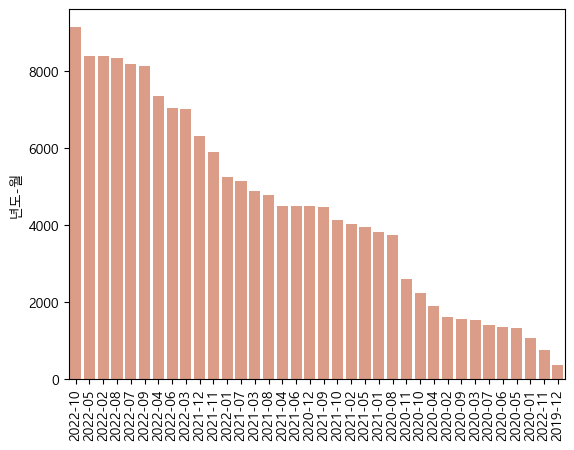

In [28]:
# 년도-월 별 거래 일수 시각화
sns.barplot(x=month.index, y=month, color='#E9967A')
plt.xticks(rotation=90)
plt.show()

In [29]:
money_sum = df2.groupby('년도-월').sum()

C:\Users\leah5\AppData\Local\Temp\ipykernel_11168\1767894324.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  money_sum = df2.groupby('년도-월').sum()


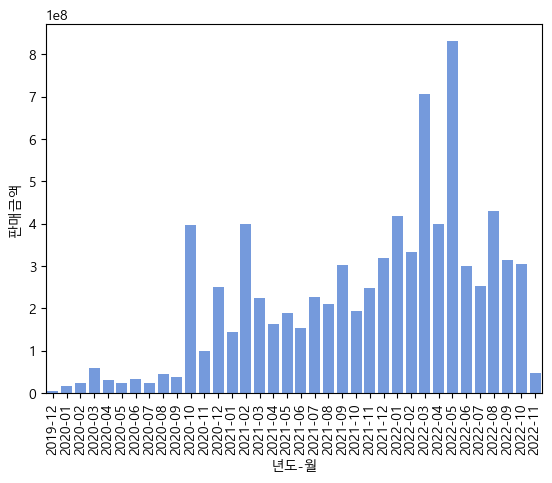

In [30]:
# 년도-월 별 판매된 금액 힙계 시각화
sns.barplot(data=money_sum, x=money_sum.index , y='판매금액', color='#6495ED')
plt.xticks(rotation=90)
plt.show()

- b. 월별 순수익 (처리 상황, 할부기간 고려) 시각화

In [31]:
# 1개월 할부는 존재하지 않는 할부로 판단하여 제거
# one_m = 1개월인 할부기간 마스킹
one_m =df2['할부기간'] == '1개월'

In [32]:
# 할부기간=1개월 row 삭제
df2 = df2[-one_m]

In [33]:
df2

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,년도-월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,2019-12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,2019-12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,2019-12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,2019-12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217852,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,NaN,2022-11
217914,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,NaN,2022-11
217927,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,NaN,2022-11
217938,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,NaN,2022-11


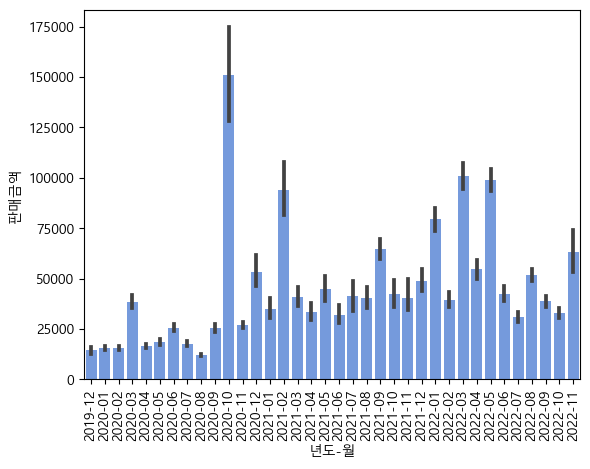

In [34]:
sns.barplot(data=df2, x='년도-월' , y='판매금액', color='#6495ED')
plt.xticks(rotation=90)
plt.show()

### 필수분석 3번) 결제 방법에 따른 분석
- a. 결제 방법과 결제금액의 연관성 분석
- b. 결제방법은 맨 앞의 한가지만 사용한 것으로 간주

In [35]:
df2['결제방법'].unique()

array(['신용카드', '가상계좌', '신 + 포', '포인트', '신 + 적 + 포', '신 + 적', '적 + 포',
       '웰컴마일', '신 + 웰컴', '적립금', '후불', '후 + 포', '후 + 적 + 포', nan, '정 + 포',
       '정기결제', '정 + 적 + 포', '정 + 적', '현금간편결제', '현 + 적', '현 + 포',
       '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [36]:
# 맨 앞의 글자의 결제 방법으로 이름 수정 
# ex) 신+포 = 신용카드
df2.replace(['신 + 포','신 + 적 + 포','신 + 적','신 + 웰컴'],'신용카드',inplace=True)
df2.replace('적 + 포','적립금',inplace=True)
df2.replace(['후 + 포','후 + 적 + 포','후 + 적'],'후불',inplace=True)
df2.replace(['정 + 포','정 + 적 + 포','정 + 적'],'정기결제',inplace=True)
df2.replace(['현 + 적', '현 + 포','현 + 적 + 포'],'현금간편결제',inplace=True)

C:\Users\leah5\AppData\Local\Temp\ipykernel_11168\3374692956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(['신 + 포','신 + 적 + 포','신 + 적','신 + 웰컴'],'신용카드',inplace=True)
C:\Users\leah5\AppData\Local\Temp\ipykernel_11168\3374692956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace('적 + 포','적립금',inplace=True)
C:\Users\leah5\AppData\Local\Temp\ipykernel_11168\3374692956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [37]:
# 결제방법 = '-', ' + 포', nan 삭제
df2 = df2[df2['결제방법']!='-']
df2 = df2[df2['결제방법']!=' + 포']
df2.dropna(subset=['결제방법'], inplace=True)

In [38]:
df2['결제방법'].unique()

array(['신용카드', '가상계좌', '포인트', '적립금', '웰컴마일', '후불', '정기결제', '현금간편결제'],
      dtype=object)

In [39]:
df2[df2['판매금액'].isna()]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,년도-월


In [40]:
# 결제 방법과 결제금액의 연관성 분석 (카이제곱검정 실시)
# df_cor = 결제방법과 판매금액 변수만 있는 데이터프레임
df_cor = df2[['결제방법', '판매금액']]

In [41]:
df_cor

,결제방법,판매금액
0,신용카드,5000
1,신용카드,5000
2,신용카드,67500
3,신용카드,30000
4,신용카드,750
...,...,...
217852,신용카드,19200
217914,신용카드,2550
217927,신용카드,1800
217938,포인트,3400


In [42]:
# 범주형 columns인 '결제방법' 수치형으로 변환
df_cor['결제방법_new'] = df_cor['결제방법'].replace('신용카드',0).replace('가상계좌',1).replace('포인트',2).replace('적립금',3).replace('웰컴마일',4).replace('후불',5).replace('정기결제',6).replace('현금간편결제',7)

C:\Users\leah5\AppData\Local\Temp\ipykernel_11168\843114720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor['결제방법_new'] = df_cor['결제방법'].replace('신용카드',0).replace('가상계좌',1).replace('포인트',2).replace('적립금',3).replace('웰컴마일',4).replace('후불',5).replace('정기결제',6).replace('현금간편결제',7)


In [43]:
df_cor

,결제방법,판매금액,결제방법_new
0,신용카드,5000,0
1,신용카드,5000,0
2,신용카드,67500,0
3,신용카드,30000,0
4,신용카드,750,0
...,...,...,...
217852,신용카드,19200,0
217914,신용카드,2550,0
217927,신용카드,1800,0
217938,포인트,3400,2


In [44]:
stats.spearmanr(df_cor['결제방법_new'],df_cor['판매금액'])
# p < 0.05 이므로 귀무가설 기각
# 두 변수 사이에 연관성이 있다.

SignificanceResult(statistic=-0.06470601041085032, pvalue=6.9535995384081036e-146)

<Axes: xlabel='결제방법_new', ylabel='판매금액'>

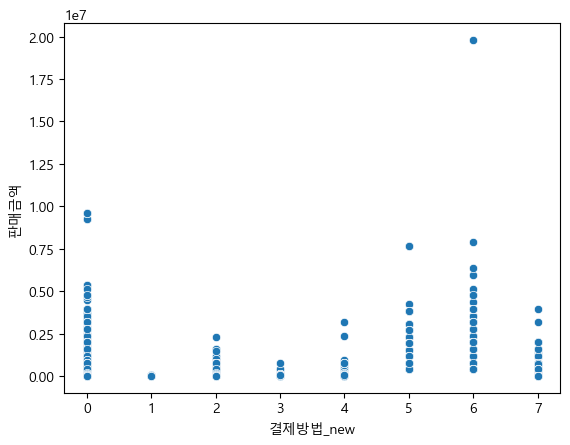

In [45]:
sns.scatterplot(x=df_cor['결제방법_new'],y=df_cor['판매금액'])